# In this notebook we will do some more data preprocessing and step into Model Selection


## Tools we are going to use in this Notebook

1. Pandas, Numpy, MatlplotLib and Seaborn for data analysis, preprocessing and manipulation
2. From SciKit-Learn Library we use `RandomForestClassifier`, `LogisticRegression`, `GradientBoostingClassifier`, `KNeighborsClassifier`, & `DecisionTreeClassifier` for Modelling and we will select the best model after tuning and evaluation 

### Standard Imports :
(We will import more libraries in future if needed)

In [22]:
# For Data Analysis and Manipulation
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# We need out plots to appear inside the notebook
%matplotlib inline

# Models form SciKit-Learn 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# For Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from scipy.stats import stats

# For Evaluation
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
data = pd.read_csv("modelling-data-final.csv")
data.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Female
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Region_Code,28,3,28,11,41
Previously_Insured,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No
Annual_Premium,40454,33536,38294,28619,27496
Policy_Sales_Channel,26,26,26,152,152
Vintage,217,183,27,203,39


In [24]:
data_column_names = {"Gender",           
                     "Age",             
                     "Driving_License",
                     "Region_Code",
                     "Previously_Insured",
                     "Vehicle_Age",
                     "Vehicle_Damage",
                     "Annual_Premium",
                     "Policy_Sales_Channel",
                     "Vintage ",
                     "Response"                  
                     }

In [25]:
object_column = data.select_dtypes(include=['object']).columns
object_column

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

## Turn Categorical Features into numbers 
**We are using OneHotEncoder**
> Before that we will split the data into X and y

**Split into X & y**

In [26]:
X_1 = data.drop("Response", axis=1)
y_1 = data["Response"]

In [27]:
# X Before transforming
X_1.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Female
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Region_Code,28,3,28,11,41
Previously_Insured,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No
Annual_Premium,40454,33536,38294,28619,27496
Policy_Sales_Channel,26,26,26,152,152
Vintage,217,183,27,203,39


**Using OneHotEncoder**

In [28]:
# Name the categorical features in a list
categorical_features = ["Gender", "Vehicle_Age", "Vehicle_Damage" ]

# Instantiate OneHotEncoder and ColumnTransformer 
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder = "passthrough")

# Converting features
transformed_X = transformer.fit_transform(X_1)

In [29]:
# X After transforming
(pd.DataFrame(transformed_X)).head().T

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0
4,1.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,1.0,1.0
6,1.0,0.0,1.0,0.0,0.0
7,44.0,76.0,47.0,21.0,29.0
8,1.0,1.0,1.0,1.0,1.0
9,28.0,3.0,28.0,11.0,41.0


In [30]:
dummies = pd.get_dummies(data[["Gender", "Vehicle_Age", "Vehicle_Damage"]])
dummies.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
Gender_Female,0,0,0,0,1,1,0,1,1,1,1
Gender_Male,1,1,1,1,0,0,1,0,0,0,0
Vehicle_Age_1-2 Year,0,1,0,0,0,0,0,1,0,0,1
Vehicle_Age_< 1 Year,0,0,0,1,1,1,1,0,1,1,0
Vehicle_Age_> 2 Years,1,0,1,0,0,0,0,0,0,0,0
Vehicle_Damage_No,0,1,0,1,1,0,0,0,1,1,0
Vehicle_Damage_Yes,1,0,1,0,0,1,1,1,0,0,1


**Quick Set-Up**

In [2]:
X_2 = transformed_X
y_2 = y_1

### Class Imbalance in the Target column

Text(0, 0.5, 'Population')

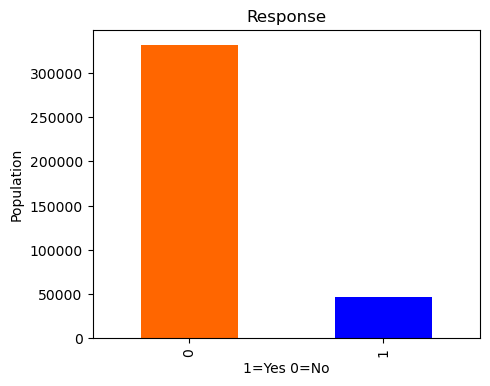

In [32]:
fig, ax = plt.subplots(figsize=(5, 4))

data["Response"].value_counts().plot(kind="bar", color=["#FF6600", "blue"])
ax.set_title("Response")
ax.set_xlabel("1=Yes 0=No")
ax.set_ylabel("Population")

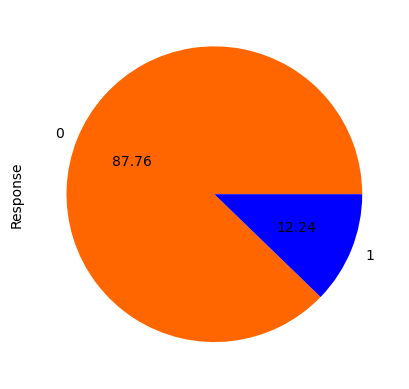

In [33]:
data["Response"].value_counts().plot.pie(autopct='%.2f', colors=['#FF6600', 'blue']);

**We can use SMOTE technique to handle class imbalance**

## Applying SMOTE for class imbalance

**Instantiate SMOTE and fit X_2, y_2**

In [34]:
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X_2, y_2)
y_sm.value_counts()

1    332638
0    332638
Name: Response, dtype: int64

**Scaling our data to fit into Logistic Regression**

In [35]:
# Instantiate StandardScaler and scale the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)

### Now we have all the data preprocessed and it is ready to fit in a model

# PART 1 `Model Selection`

#### 1. Split the data into X and y

In [36]:
X = X_scaled
y = y_sm

#### 2. Split the data into Train and Test split

In [37]:
# Set-up Random seed
np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # We have split the data into 70% and 30%

In [38]:
X_train.shape, X_test.shape

((465693, 14), (199583, 14))

In [57]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

## 1. Feature Selection
> Before we build a model we need our data to be compact so we will do some Dimensionality Reduction

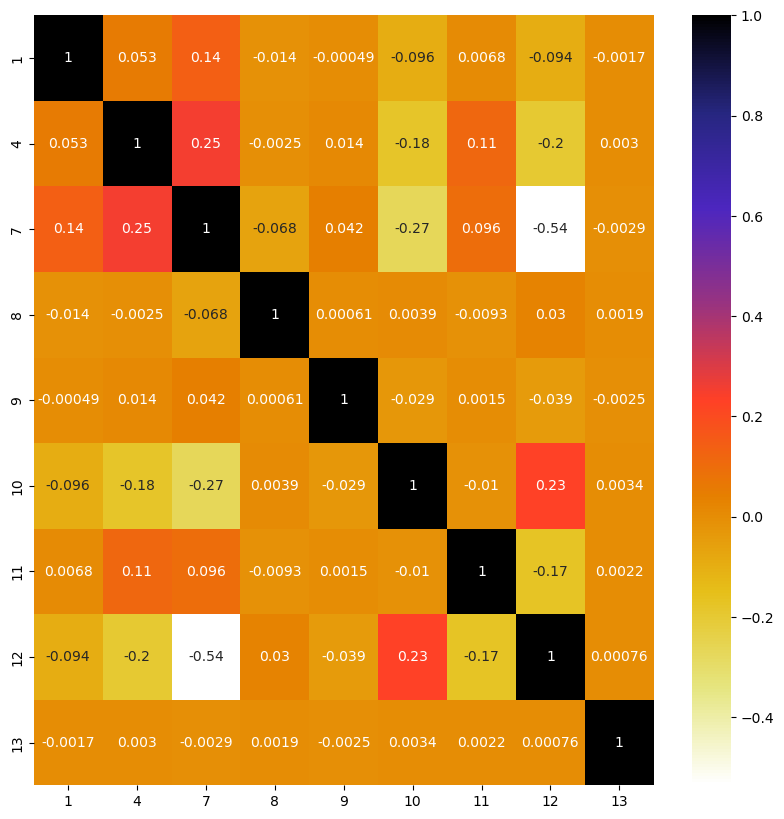

In [120]:
plt.figure(figsize=(10, 10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show();

## Pearson Correlation

In [60]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # We are interested in absolute coeff value.
                colname = corr_matrix.columns[j]  # Getting the name of the column j
                col_corr.add(colname)

    return col_corr

In [61]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

5

In [62]:
corr_features

{0, 2, 3, 5, 6}

In [64]:
X_train = X_train.drop(corr_features, axis = 1)
X_test = X_test.drop(corr_features, axis = 1)

## 2. We are going to build 5 different machine learning models
1. GradientBoostingClassifier
2. LogisticRegression
3. RandomForestClassifier
4. KNeighborsClassifier
5. DecisionTreeClassifier

> We are going to put the models in a `Dictionary` and create a function to `fit` and `score` models

In [65]:
# Put the Models into a dictionary
clf = {"Gradient Boosting" : GradientBoostingClassifier(),
       "Logistic Regression" : LogisticRegression(),
       "Random Forest" : RandomForestClassifier(),
       "KNeighbors" : KNeighborsClassifier(),
       "Decision Tree" : DecisionTreeClassifier()
      }

In [66]:
# Function to fit the model and get score
def fit_and_score(clf, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluates given Machine Learning models.
    clf : A dictionary of different Scikit-Learn Machine Learning Models
    X_train : Training data (no Labels)
    X_test : Testing Data (No Labels)
    y_train : Training Labels
    y_test : Test Labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dict to store the scores
    model_scores = {}
    # Loop through the models
    for name, clf in clf.items():
        # Fit the model to the data
        clf.fit(X_train, y_train)
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = clf.score(X_test, y_test)
    return model_scores

In [67]:
%%time
scores = fit_and_score(clf, X_train, X_test, y_train, y_test)
scores_table = pd.DataFrame(scores, index=[1])
model_scores = pd.DataFrame(scores_table)
model_scores

CPU times: total: 8min 27s
Wall time: 8min 46s


,Gradient Boosting,Logistic Regression,Random Forest,KNeighbors,Decision Tree
1,0.858595,0.758291,0.914001,0.839265,0.892636


## Let's compare the scores in a `Bar Graph` 

<Figure size 800x600 with 0 Axes>

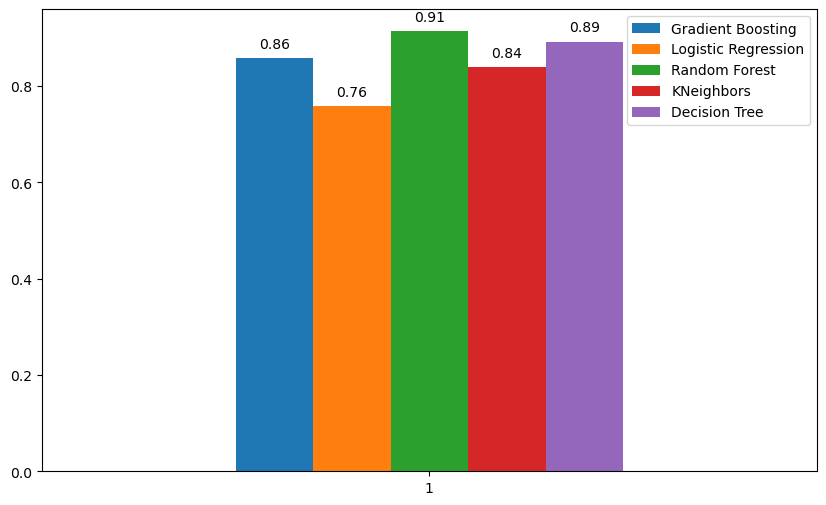

In [77]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
plt.figure(figsize=(8, 6))
ax = model_scores.plot(kind='bar', figsize=(10, 6))

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Rotate the bars by setting width as 0.9
ax.set_aspect('auto', adjustable='box')
plt.xticks(rotation=0)
plt.show()

**Based on the above tests we have come to a conclusion that we may tune and evaluate :**
1. `Random Forest`
2. `Decision Tree`
3. `Gradient Boosting`

In [78]:
# (a). Create HyperParameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 100, 10),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)
          }

# (b). Create a HyperParameter grid for GradientBoostingClassifier
gbc_grid = {"n_estimators" : [10, 100, 10],  
            "max_depth" : [None, 3, 5, 10],  
            "min_samples_split" : np.arange(2, 20, 2),
            "min_samples_leaf" : np.arange(1, 20, 2),  
            "max_features" : ['sqrt', 'log2', None]
           }

# (c). Create a HyperParameter grid for Decision Tree
dt_grid = {'criterion': ['gini', 'entropy'],
           'max_depth': [None, 5, 10, 15, 20],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4],
           'max_features': ['auto', 'sqrt', 'log2', None]
          }

### 1(a).  Random Forest Classifier `RandomSearchCV`

In [79]:
%%time
# Set-up random HyperParameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1, random_state = 42),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 2,
                           verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 18.3 s
Wall time: 1min 17s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [80]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [81]:
rs_rf.score(X_train, y_train)

0.8536439242161682

In [82]:
rs_rf.score(X_test, y_test)

0.8517759528617167

### 1.(b) Decision Tree `RandomSearchCV`

In [84]:
%%time
# Set-up random HyperParameter search for Decision Tree
dt_rs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42),
                            param_distributions = dt_grid,
                            n_iter = 2,
                            cv = 5,
                            verbose = True)

# Fit random hyperparameter search model for Decision Tree
dt_rs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 6.77 s
Wall time: 7.13 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   verbose=True)

In [85]:
dt_rs.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'gini'}

In [86]:
dt_rs.score(X_train, y_train)

0.8101925517454632

In [87]:
dt_rs.score(X_test, y_test)

0.8087462359018553

### 1.(c) GradientBoostingClassifier `RandomSearchCV`

In [88]:
%%time
# Set-up random HyperParameter search for GradientBoostingClassifier
gbc_rs = RandomizedSearchCV(GradientBoostingClassifier(random_state = 42),
                            param_distributions = gbc_grid,
                            n_iter = 2,
                            cv = 5,
                            verbose = True)

# Fit random hyperparameter search model for GradientBoostingClassifier
gbc_rs.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 9min 14s
Wall time: 9min 42s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [10, 100, 10]},
                   verbose=True)

In [89]:
gbc_rs.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': None}

In [90]:
gbc_rs.score(X_train, y_train)

0.959303661425016

In [91]:
gbc_rs.score(X_test, y_test)

0.9069960868410636

In [98]:
scores_2 = {"Random Forest" : rs_rf.score(X_test, y_test),
            "Decision Tree" : dt_rs.score(X_test, y_test),
            "Gradient Boosting" : gbc_rs.score(X_test, y_test)  
           }
rs_tuned_scores = pd.DataFrame(scores_2, index = [1])

In [99]:
model_scores

,Gradient Boosting,Logistic Regression,Random Forest,KNeighbors,Decision Tree
1,0.858595,0.758291,0.914001,0.839265,0.892636


In [100]:
rs_tuned_scores

,Random Forest,Decision Tree,Gradient Boosting
1,0.851776,0.808746,0.906996


## 2. Tuning Using `GridSearchCV`

In [121]:
# (a). Create HyperParameter grid for RandomForestClassifier
rf_grid_2 = {"n_estimators" : np.arange(10, 80, 10),
             "max_depth" : [2, 4],
             "min_samples_split" : [2, 5],
             "min_samples_leaf" : [1, 2],
             "max_features" : ['auto', 'sqrt', None]
            }

# (a). Create HyperParameter grid for Decision Tree
dt_grid_2 = {'criterion': ['gini', 'entropy'],
             'max_depth': [None, 5, 10, 15, 20],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'max_features': ['auto', 'sqrt', 'log2', None]
             }

# (c). Create a HyperParameter grid for GradientBoostingClassifier
gbc_grid_2 = {"n_estimators": np.arange(10, 50, 10),
              "max_depth": [2],
              "min_samples_split": [2],
              "min_samples_leaf": [1],
              "max_features": ['sqrt', None]
             }

### 2(a). RandomForestClassifier `GridSearchCV`

In [107]:
%%time
# Set-up random HyperParameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(random_state = 42),
                     param_grid = rf_grid_2,
                     cv = 2,
                     verbose = 2,
                     n_jobs = 4)

# Fit random hyperparameter search model for RandomForestClassifier()
gs_rf.fit(X_train, y_train)

Fitting 2 folds for each of 168 candidates, totalling 336 fits


D:\BIA\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
112 fits failed out of a total of 336.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
99 fits failed with the following error:
Traceback (most recent call last):
  File "D:\BIA\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\BIA\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\BIA\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\BIA\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    rais

CPU times: total: 29.3 s
Wall time: 22min 54s


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70])},
             verbose=2)

In [108]:
gs_rf.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

In [109]:
gs_rf.score(X_train, y_train)

0.8166066485860857

In [110]:
gs_rf.score(X_test, y_test)

0.8158911330123307

### 2(b) Decision Tree `GridSearchCV`

In [112]:
%%time
# Set-up random HyperParameter search for Decision Tree
gs_dt = GridSearchCV(DecisionTreeClassifier(random_state = 42),
                     param_grid = dt_grid_2,
                     cv = 2,
                     verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
gs_dt.fit(X_train, y_train)

Fitting 2 folds for each of 360 candidates, totalling 720 fits


D:\BIA\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "D:\BIA\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\BIA\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\BIA\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\BIA\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    rai

CPU times: total: 14min 36s
Wall time: 18min 36s


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=True)

In [113]:
gs_dt.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [114]:
gs_dt.score(X_train, y_train)

0.9572529541994405

In [116]:
gs_dt.score(X_test, y_test)

0.9011939894680409

### 2(c). GradientBoostingClassifier `GridSearchCV`

In [122]:
%%time
# Set-up random HyperParameter search for GradientBoostingClassifier
gs_gbc = GridSearchCV(GradientBoostingClassifier(random_state = 42),
                            param_grid = gbc_grid_2,
                            cv = 2,
                            verbose = True)

# Fit random hyperparameter search model for GradientBoostingClassifier
gs_gbc.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
CPU times: total: 3min
Wall time: 3min 33s


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': [2], 'max_features': ['sqrt', None],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': array([10, 20, 30, 40])},
             verbose=True)

In [123]:
gs_gbc.best_params_

{'max_depth': 2,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

In [124]:
gs_gbc.score(X_train, y_train)

0.8204482352107504

In [125]:
gs_gbc.score(X_test, y_test)

0.8190827876121713

In [126]:
scores_3 = {"Random Forest" : gs_rf.score(X_test, y_test),
            "Decision Tree" : gs_dt.score(X_test, y_test),
            "Gradient Boosting" : gs_gbc.score(X_test, y_test)  
           }
gs_tuned_scores = pd.DataFrame(scores_3, index = [1])

In [127]:
model_scores

,Gradient Boosting,Logistic Regression,Random Forest,KNeighbors,Decision Tree
1,0.858595,0.758291,0.914001,0.839265,0.892636


In [128]:
rs_tuned_scores

,Random Forest,Decision Tree,Gradient Boosting
1,0.851776,0.808746,0.906996


In [129]:
gs_tuned_scores

,Random Forest,Decision Tree,Gradient Boosting
1,0.815891,0.901194,0.819083
